In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from fancyimpute import KNN
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Using TensorFlow backend.


In [2]:
os.chdir("E:\Data Science(Edwisor)\Project\Project #2\Dataset")

In [3]:
dataset = pd.read_csv('credit-card-data.csv',encoding = 'utf-8')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [4]:
dataset = dataset.iloc[:,1:19] 
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

In [5]:
dataset.shape

(8950, 17)

## Missing Value Analysis

In [6]:
dataset.columns[dataset.isnull().any()]

Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')

In [7]:
dataset['CREDIT_LIMIT'].isnull().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [8]:
percentage_missing = (1/8950)*100
print(percentage_missing)

0.0111731843575419


In [9]:
dataset['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8637
True      313
Name: MINIMUM_PAYMENTS, dtype: int64

In [10]:
percentage_missing = (313/8950)*100
print(percentage_missing)

3.4972067039106145


In [11]:
#imputation method
#Actual value = 81.433073
#Mean = 864.2971830495586
#Median = 312.4522915
#KNN =11.834127

In [12]:
dataset = pd.DataFrame(KNN(k = 3).fit_transform(dataset), columns = dataset.columns)

Imputing row 1/8950 with 0 missing, elapsed time: 13.432
Imputing row 101/8950 with 0 missing, elapsed time: 13.432
Imputing row 201/8950 with 0 missing, elapsed time: 13.433
Imputing row 301/8950 with 0 missing, elapsed time: 13.434
Imputing row 401/8950 with 0 missing, elapsed time: 13.435
Imputing row 501/8950 with 0 missing, elapsed time: 13.435
Imputing row 601/8950 with 0 missing, elapsed time: 13.436
Imputing row 701/8950 with 0 missing, elapsed time: 13.436
Imputing row 801/8950 with 0 missing, elapsed time: 13.436
Imputing row 901/8950 with 0 missing, elapsed time: 13.438
Imputing row 1001/8950 with 0 missing, elapsed time: 13.439
Imputing row 1101/8950 with 0 missing, elapsed time: 13.440
Imputing row 1201/8950 with 0 missing, elapsed time: 13.440
Imputing row 1301/8950 with 0 missing, elapsed time: 13.441
Imputing row 1401/8950 with 0 missing, elapsed time: 13.441
Imputing row 1501/8950 with 0 missing, elapsed time: 13.442
Imputing row 1601/8950 with 0 missing, elapsed time:

In [13]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

# Feature engineering to create KPI's

In [14]:
#1  Monthly Average Purchase

dataset['MONTHLY_AVG_PURCHASE'] =  dataset['PURCHASES']/dataset['TENURE']

In [15]:
#2 Average Cash Advance Amount

dataset['CASH_ADVANCE_AVG'] = dataset['CASH_ADVANCE']/dataset['TENURE']

In [16]:
#3 Purchases by Type
df = pd.DataFrame()
df['ONEOFF_PURCHASES'] = np.where(dataset['ONEOFF_PURCHASES'] > 0, True, False)
df['INSTALLMENTS_PURCHASES'] = np.where(dataset['INSTALLMENTS_PURCHASES'] > 0, True, False)
df.groupby(['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']).size().reset_index().rename(columns={0:'count'})

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,count
0,False,False,2042
1,False,True,2260
2,True,False,1874
3,True,True,2774


In [17]:
dataset['PURCHASE_TYPE']=None
for i in range(0,8950):
    if df['ONEOFF_PURCHASES'][i] == False and df['INSTALLMENTS_PURCHASES'][i] == False:
        dataset['PURCHASE_TYPE'][i] = 'None'
    elif df['ONEOFF_PURCHASES'][i] == False and df['INSTALLMENTS_PURCHASES'][i] == True:
        dataset['PURCHASE_TYPE'][i] = 'Installement'
    elif df['ONEOFF_PURCHASES'][i] == True and df['INSTALLMENTS_PURCHASES'][i] == False:
        dataset['PURCHASE_TYPE'][i] = 'One off'
    else:
        dataset['PURCHASE_TYPE'][i] = 'Both'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launche

In [18]:
#4 limit usage (balance to credit limit ratio)
dataset['LIMIT_RATIO'] =dataset['BALANCE']/dataset['CREDIT_LIMIT']

In [19]:
#5  payments to minimum payments ratio 
dataset['PAYMENT_MIN_PAYEMENT_RATIO'] = dataset['PAYMENTS']/dataset['MINIMUM_PAYMENTS']

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

In [21]:
#Encoding categorical variable
dataset_onehot = dataset.copy()
dataset_onehot = pd.get_dummies(dataset_onehot, columns=['PURCHASE_TYPE'], prefix = ['PURCHASE_TYPE'])

print(dataset_onehot.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

In [23]:
dataset_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 25 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

# Gaining insights on KPI's

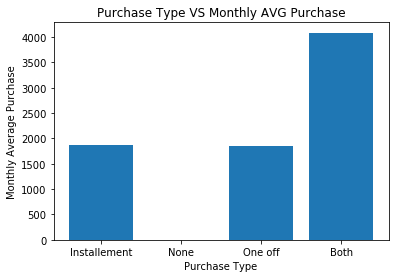

In [24]:
plt.bar(dataset['PURCHASE_TYPE'],dataset['MONTHLY_AVG_PURCHASE'])
plt.title('Purchase Type VS Monthly AVG Purchase')
plt.xlabel('Purchase Type')
plt.ylabel('Monthly Average Purchase')
plt.show()

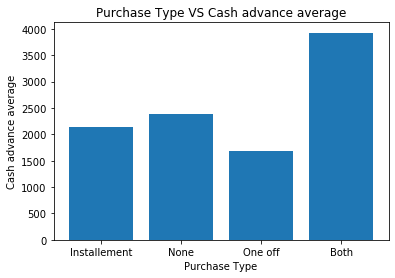

In [25]:
plt.bar(dataset['PURCHASE_TYPE'],dataset['CASH_ADVANCE_AVG'])
plt.title('Purchase Type VS Cash advance average')
plt.xlabel('Purchase Type')
plt.ylabel('Cash advance average')
plt.show()

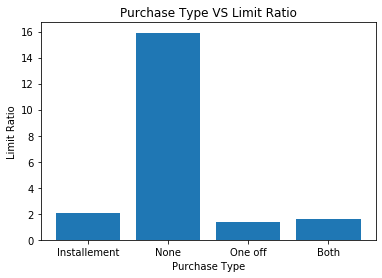

In [26]:
plt.bar(dataset['PURCHASE_TYPE'],dataset['LIMIT_RATIO'])
plt.title('Purchase Type VS Limit Ratio')
plt.xlabel('Purchase Type')
plt.ylabel('Limit Ratio')
plt.show()

# Feature Selection

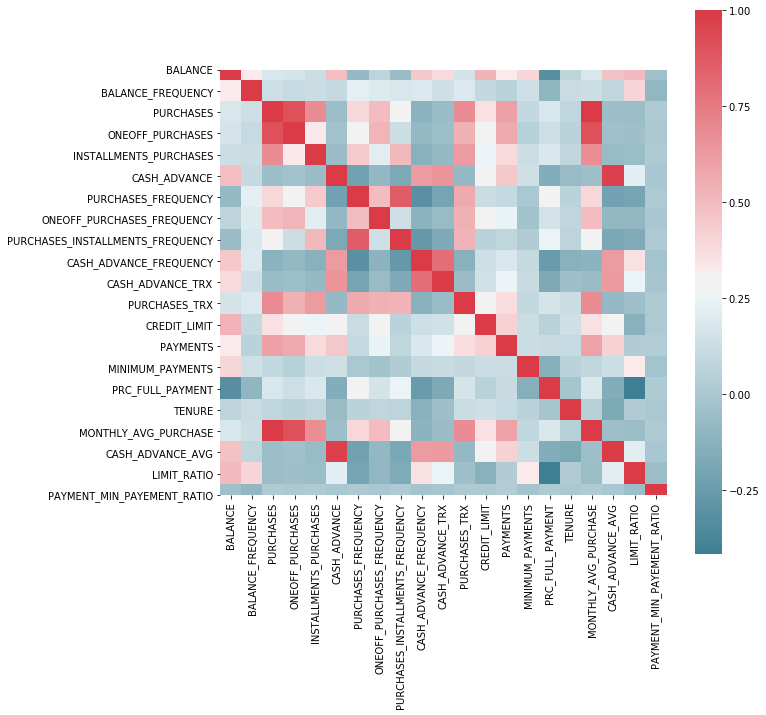

In [27]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = dataset.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [28]:
# AS the KPI's generated have a high correlation with there orignal variables we'll remove them
#Getting rid of original variables that are used for creating new KPIs
col = ['BALANCE', 'PURCHASES' ,'PAYMENTS' ,'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'CASH_ADVANCE' ,'CREDIT_LIMIT']

dataset_final = dataset_onehot.drop(col,axis=1)
dataset_final.shape

(8950, 17)

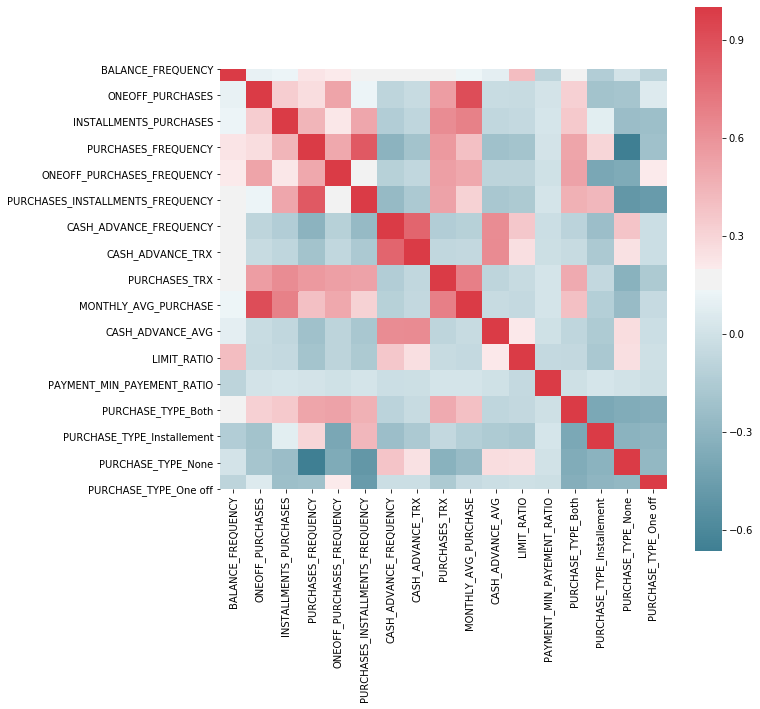

In [29]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = dataset_final.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Feature scaling

In [30]:
sc = StandardScaler()

In [31]:
dataset_final=dataset_final.round(2)
dataset_final

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,CASH_ADVANCE_AVG,LIMIT_RATIO,PAYMENT_MIN_PAYEMENT_RATIO,PURCHASE_TYPE_Both,PURCHASE_TYPE_Installement,PURCHASE_TYPE_None,PURCHASE_TYPE_One off
0,0.82,0.00,95.40,0.17,0.00,0.08,0.00,0.0,2.0,7.95,0.00,0.04,1.45,0,1,0,0
1,0.91,0.00,0.00,0.00,0.00,0.00,0.25,4.0,0.0,0.00,536.91,0.46,3.83,0,0,1,0
2,1.00,773.17,0.00,1.00,1.00,0.00,0.00,0.0,12.0,64.43,0.00,0.33,0.99,0,0,0,1
3,0.64,1499.00,0.00,0.08,0.08,0.00,0.08,1.0,1.0,124.92,17.15,0.22,0.00,0,0,0,1
4,1.00,16.00,0.00,0.08,0.08,0.00,0.00,0.0,1.0,1.33,0.00,0.68,2.77,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,1.00,0.00,291.12,1.00,0.00,0.83,0.00,0.0,6.0,48.52,0.00,0.03,6.66,0,1,0,0
8946,1.00,0.00,300.00,1.00,0.00,0.83,0.00,0.0,6.0,50.00,0.00,0.02,1.67,0,1,0,0
8947,0.83,0.00,144.40,0.83,0.00,0.67,0.00,0.0,5.0,24.07,0.00,0.02,0.99,0,1,0,0
8948,0.83,0.00,0.00,0.00,0.00,0.00,0.17,2.0,0.0,0.00,6.09,0.03,0.94,0,0,1,0


In [32]:
sc.fit_transform(dataset_final)
dataset_final.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,CASH_ADVANCE_AVG,LIMIT_RATIO,PAYMENT_MIN_PAYEMENT_RATIO,PURCHASE_TYPE_Both,PURCHASE_TYPE_Installement,PURCHASE_TYPE_None,PURCHASE_TYPE_One off
0,0.82,0.00,95.4,0.17,0.00,0.08,0.00,0.0,2.0,7.95,0.00,0.04,1.45,0,1,0,0
1,0.91,0.00,0.0,0.00,0.00,0.00,0.25,4.0,0.0,0.00,536.91,0.46,3.83,0,0,1,0
2,1.00,773.17,0.0,1.00,1.00,0.00,0.00,0.0,12.0,64.43,0.00,0.33,0.99,0,0,0,1
3,0.64,1499.00,0.0,0.08,0.08,0.00,0.08,1.0,1.0,124.92,17.15,0.22,0.00,0,0,0,1
4,1.00,16.00,0.0,0.08,0.08,0.00,0.00,0.0,1.0,1.33,0.00,0.68,2.77,0,0,0,1


# PCA for dimension reduction

In [33]:
var_ratio={}
for n in range(2,15):
    pc = PCA(n_components=n)
    dataset_pca=pc.fit(dataset_final)
    var_ratio[n]=sum(dataset_pca.explained_variance_ratio_)

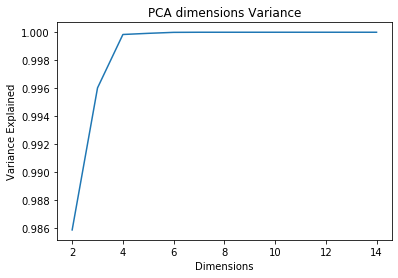

In [34]:
key=[]
values=[]
for keys in var_ratio.keys():
    key.append(keys)
    values.append(var_ratio[keys])
plt.plot(key,values)
plt.xlabel('Dimensions')
plt.ylabel('Variance Explained')
plt.title('PCA dimensions Variance')
plt.show()

In [35]:
n=5
pc = PCA(n_components=n)
dataset_pca = pc.fit_transform(dataset_final)
dataset_pca.shape


(8950, 5)

# Clustering

In [36]:
#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(dataset_pca)
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

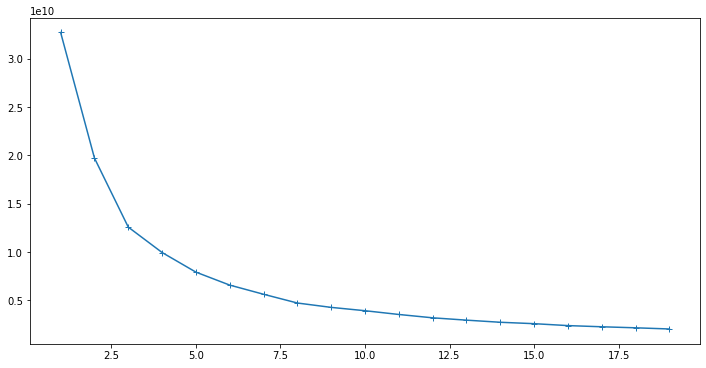

In [37]:
#Plot line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "+" )

In [38]:
clusters = KMeans(4).fit(dataset_pca)
y = clusters.predict(dataset_pca)

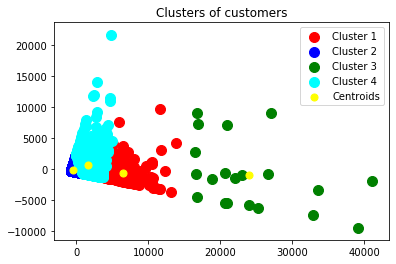

In [39]:
plt.scatter(dataset_pca[y == 0, 0], dataset_pca[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataset_pca[y == 1, 0], dataset_pca[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dataset_pca[y == 2, 0], dataset_pca[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dataset_pca[y == 3, 0], dataset_pca[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

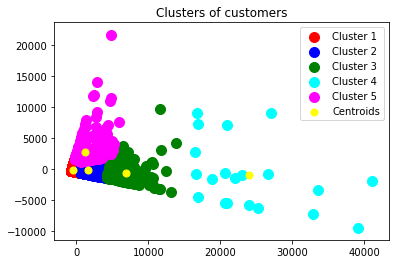

In [40]:
clusters = KMeans(5).fit(dataset_pca)
y = clusters.predict(dataset_pca)
plt.scatter(dataset_pca[y == 0, 0], dataset_pca[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataset_pca[y == 1, 0], dataset_pca[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dataset_pca[y == 2, 0], dataset_pca[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dataset_pca[y == 3, 0], dataset_pca[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(dataset_pca[y == 4, 0], dataset_pca[y == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()